#### Seaborn

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
import pandas as pd

In [3]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

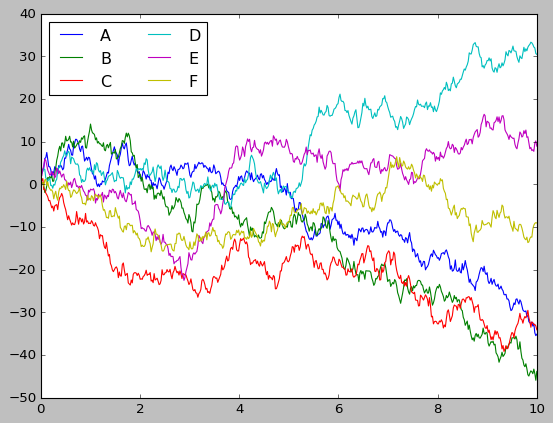

In [4]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [5]:
import seaborn as sns
sns.set()

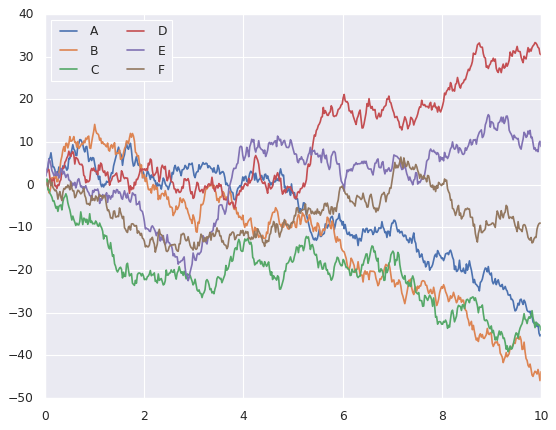

In [6]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

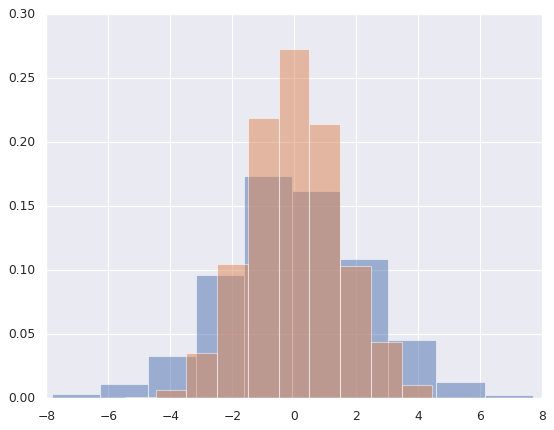

In [7]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

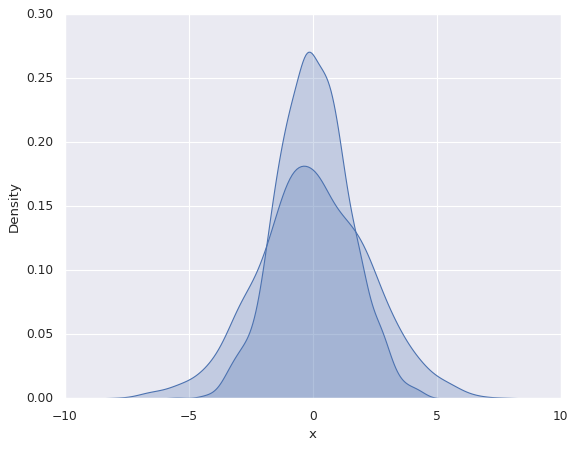

In [8]:
for col in 'xy':
    sns.kdeplot(data[col], fill=True)

In [9]:
# matplotlib 3.4.3 for basemap
!pip3 uninstall matplotlib -y

Found existing installation: matplotlib 3.7.2
Uninstalling matplotlib-3.7.2:
  Successfully uninstalled matplotlib-3.7.2


In [13]:
!pip3 install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 6.7 MB/s eta 0:00:0000:0100:01


<Axes: xlabel='x', ylabel='Count'>

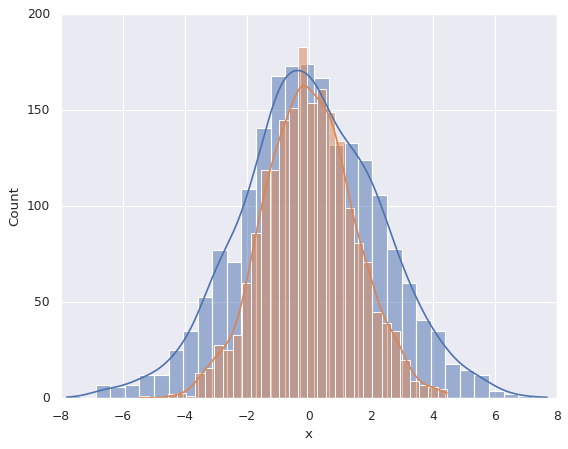

In [9]:
# reference: https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751
# issue: https://github.com/mwaskom/seaborn/issues/3312
# issue: https://github.com/matplotlib/matplotlib/issues/16295
sns.histplot(data['x'], kde=True)
sns.histplot(data['y'], kde=True)
    

<Axes: xlabel='x', ylabel='y'>

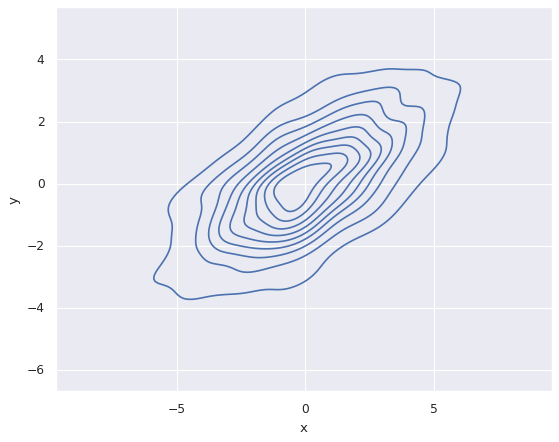

In [12]:
sns.kdeplot(x=data['x'], y=data['y'])

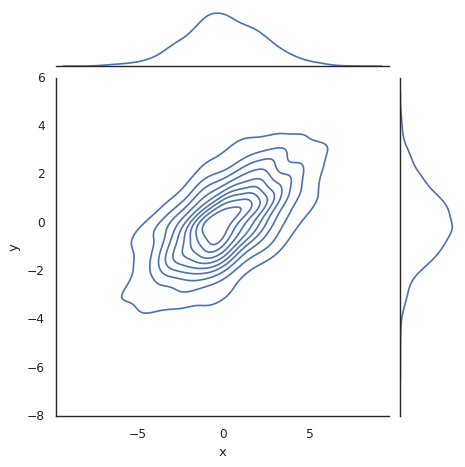

In [13]:
with sns.axes_style('white'):
    sns.jointplot(data, x='x', y='y', kind='kde')

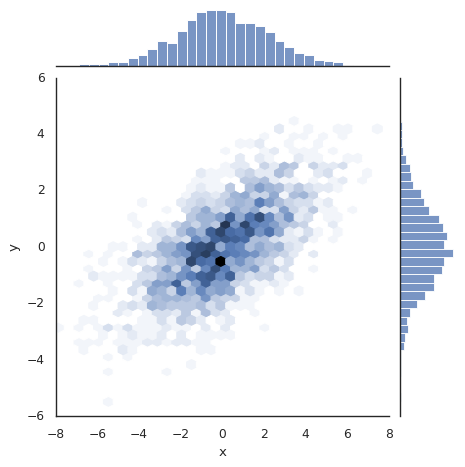

In [18]:
with sns.axes_style('white'):
    sns.jointplot(data, x="x", y="y", kind="hex")

In [14]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


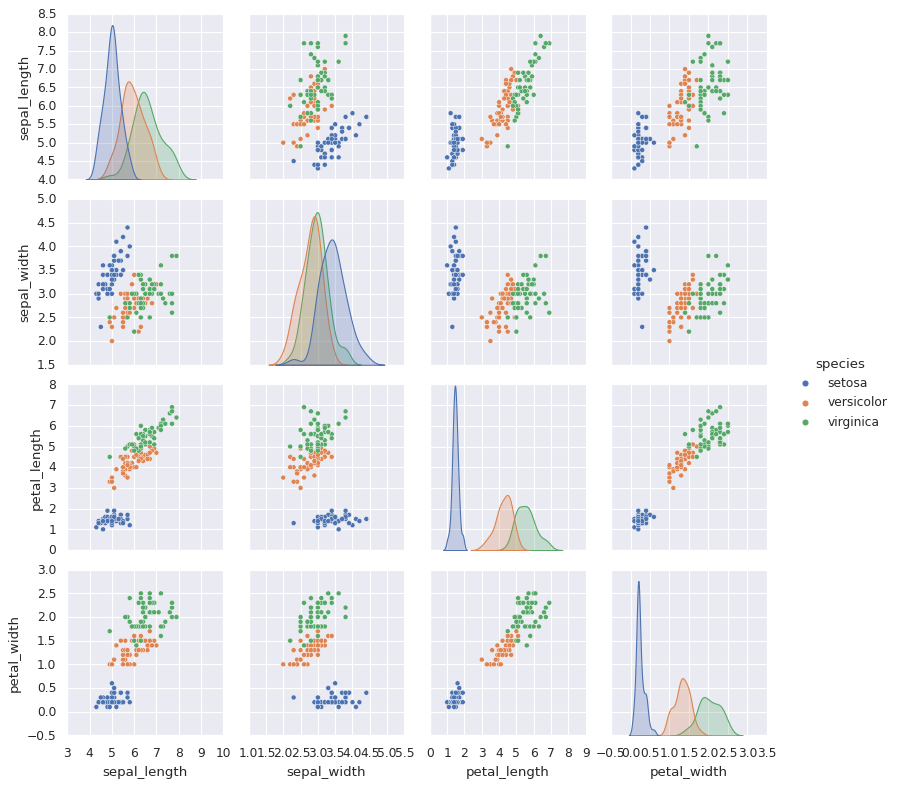

In [15]:
sns.pairplot(iris, hue='species', height=2.5)

In [25]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


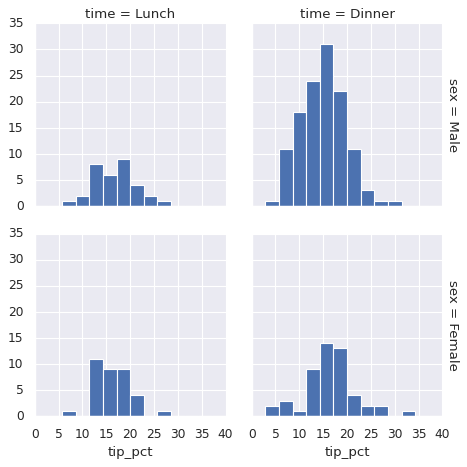

In [26]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0, 40, 15))

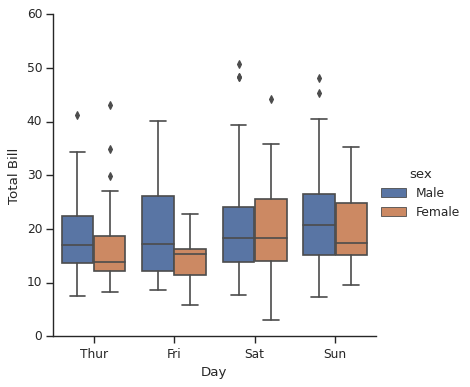

In [27]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x='day', y='total_bill', hue='sex', data=tips, kind='box')
    g.set_axis_labels('Day', 'Total Bill')

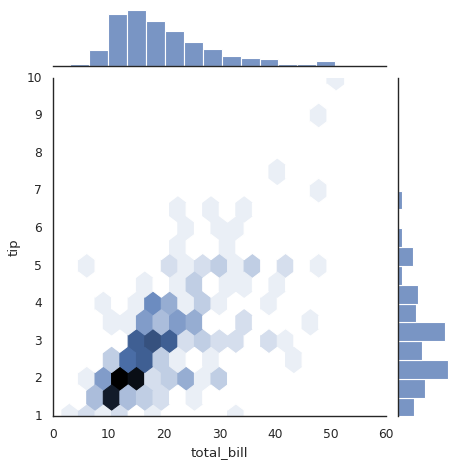

In [28]:
with sns.axes_style('white'):
    sns.jointplot(tips, x="total_bill", y="tip", kind="hex")

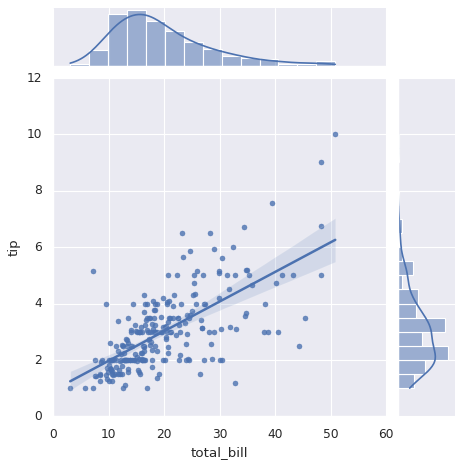

In [29]:
sns.jointplot(tips, x="total_bill", y="tip", kind="reg")

In [30]:
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


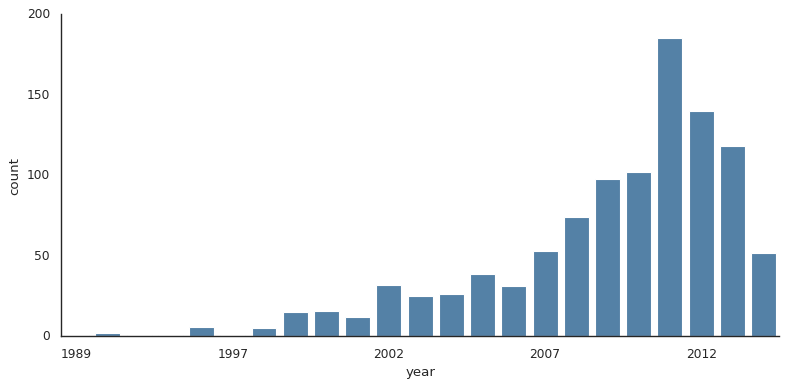

In [32]:
with sns.axes_style("white"):
    g = sns.catplot(x="year", data=planets, aspect=2,
                       kind="count", color="steelblue")
    g.set_xticklabels(step=5)

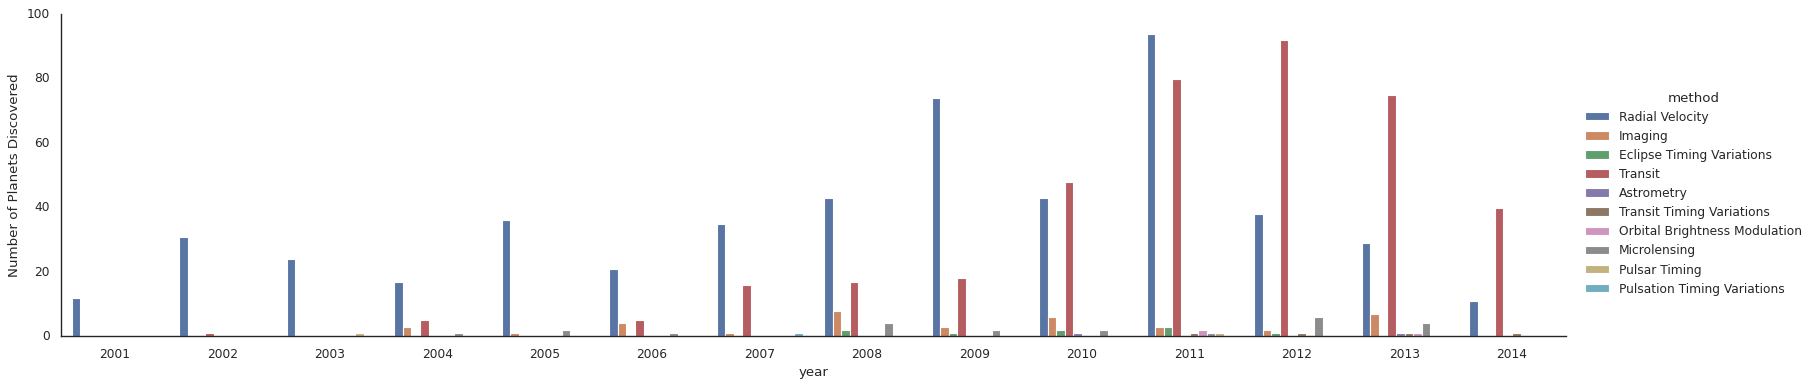

In [33]:
with sns.axes_style("white"):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind="count",
                    hue="method", order=range(2001, 2015))
    g.set_ylabels("Number of Planets Discovered")

In [35]:
# data source: https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv
data = pd.read_csv("data/marathon-data.csv")
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [36]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [37]:
def convert_time(string_time):
    h, m, s = map(int, string_time.split(":"))
    return pd.Timedelta(hours=h, minutes=m, seconds=s)

In [38]:
data = pd.read_csv("data/marathon-data.csv", converters={"split": convert_time, "final": convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [39]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [40]:
# 以秒為單位(nano=10^(-9))
data["split_sec"] = data["split"].astype(int) / 1E9
data["final_sec"] = data["final"].astype(int) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


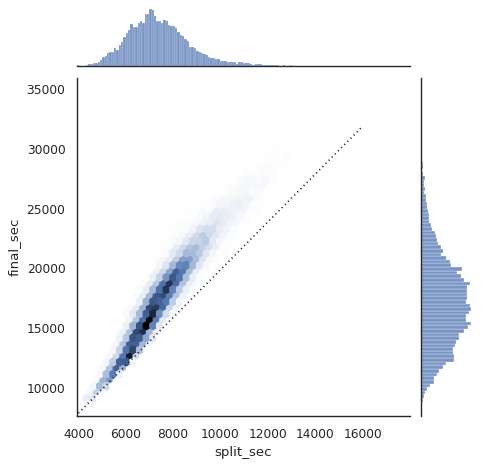

In [41]:
with sns.axes_style("white"):
    g = sns.jointplot(data, x="split_sec", y="final_sec", kind="hex")
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ":k")

In [42]:
data["split_frac"] = 1 - 2 * data["split_sec"] / data["final_sec"]
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


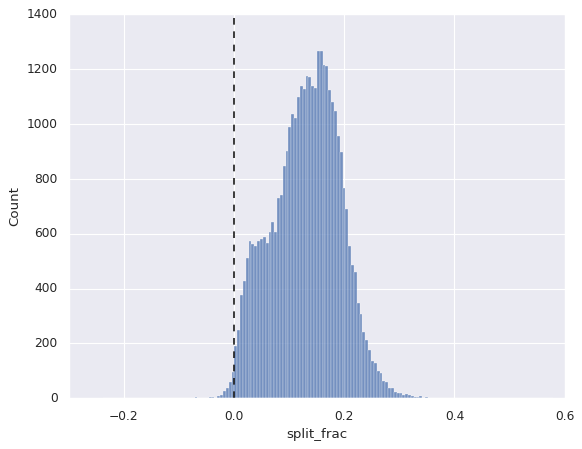

In [44]:
sns.histplot(data["split_frac"], kde=False)
plt.axvline(0, color="k", linestyle="--")

In [45]:
sum(data["split_frac"] < 0)

251

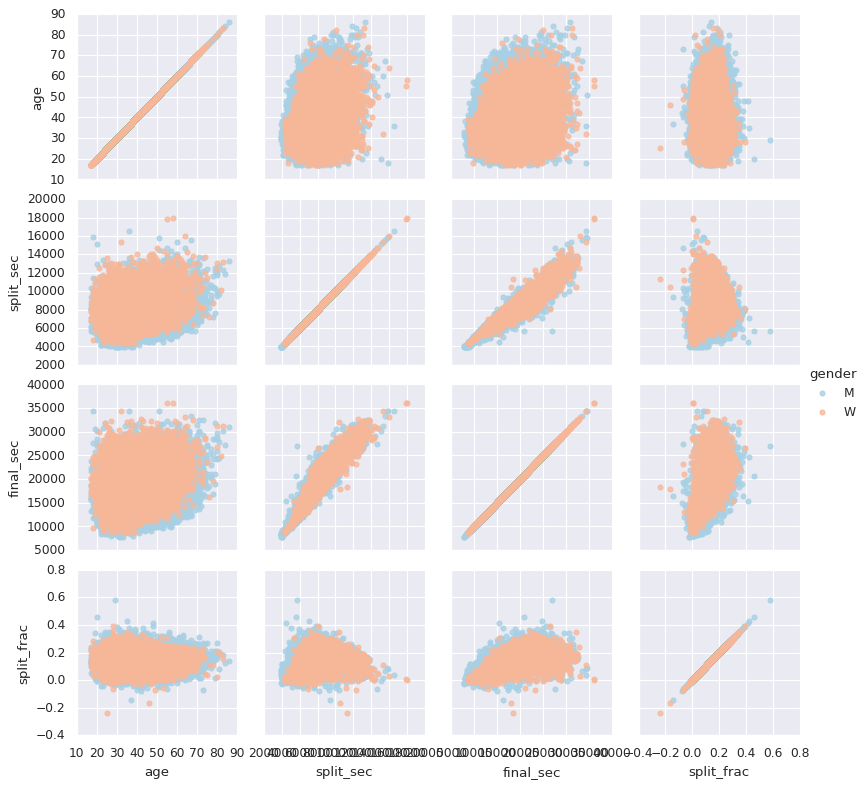

In [46]:
g = sns.PairGrid(data, vars=["age", "split_sec", "final_sec", "split_frac"],
                 hue="gender", palette="RdBu_r")
g.map(plt.scatter, alpha=0.8)
g.add_legend()

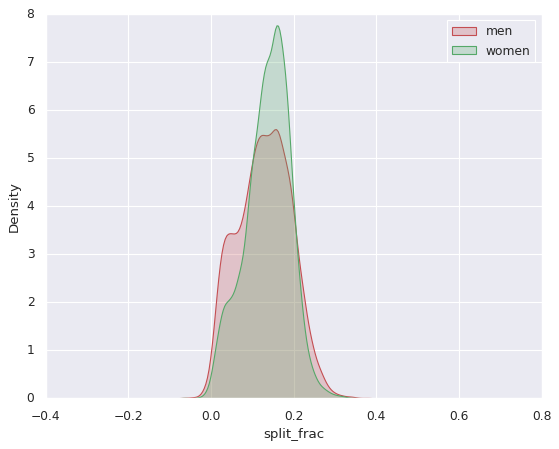

In [49]:
sns.kdeplot(data.loc[data["gender"] == "M", "split_frac"], label="men", fill=True, color="r")
sns.kdeplot(data.loc[data["gender"] == "W", "split_frac"], label="women", fill=True, color="g")
plt.xlabel("split_frac")
plt.legend()

<Axes: xlabel='gender', ylabel='split_frac'>

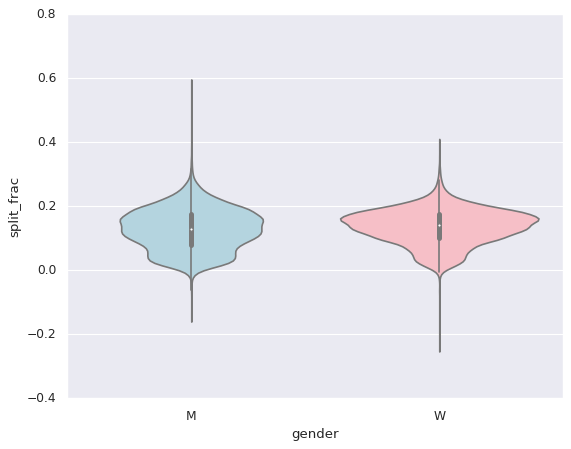

In [50]:
sns.violinplot(data, x="gender", y="split_frac",
               palette=["lightblue", "lightpink"])

In [51]:
data["age_dec"] = data["age"].map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


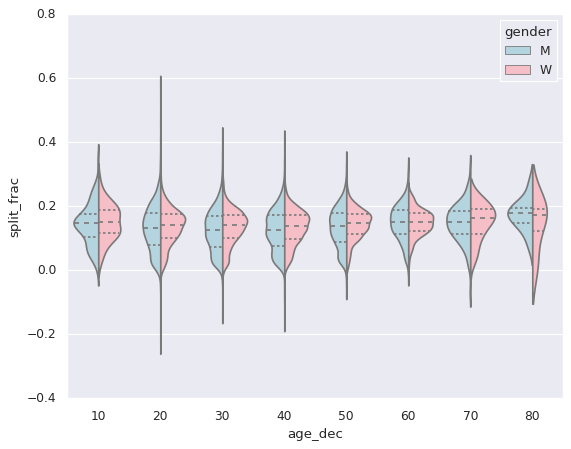

In [52]:
with sns.axes_style(style=None):
    sns.violinplot(data, x="age_dec", y="split_frac", hue="gender",
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"])    

In [53]:
sum(data["age"] > 80)

7

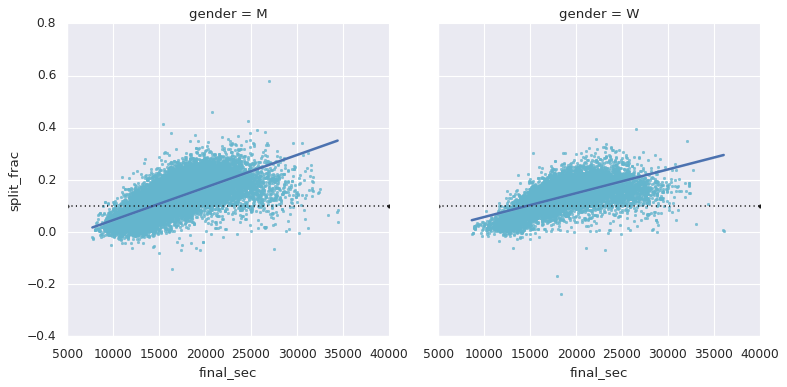

In [54]:
g = sns.lmplot(data, x="final_sec", y="split_frac", col="gender",
               markers=".", scatter_kws=dict(color="c"))
g.map(plt.axhline, y=0.1, color="k", ls=":")

### 其他繪圖程式庫
- Bokeh
- Plotly
- Vispy
- Vega